<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_17_convolution_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
import scipy as sc
#import tensorflow as tf
#https://setosa.io/ev/image-kernels/

In [4]:
12*1+2*1*1+12*-1+-1+-1

0

# Convolución
![convolucion](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/convolution.png?raw=true)




1. Dada una imagen  :

```
M = array([[10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0]])
```
Apliquemos un filtro
```
filter = array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])
```

Y construyamos la operacion de convolucion

Results = M * Filter

```
Results = array([[ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0]])
  ```


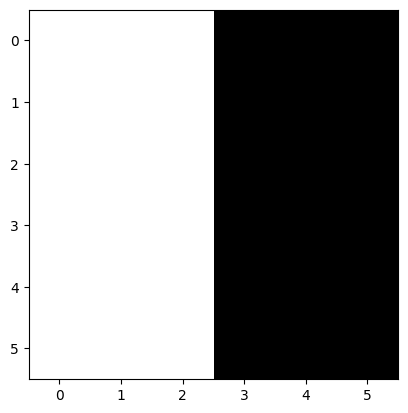

In [9]:
#Construyamos una imagen de negros y blancos
V = np.array([10,10,10,0,0,0])
Img = np.tile(V,6).reshape(6,6)
Img
plt.imshow(Img, cmap="gray")

 Detectemos los bordes con un filtro vertical
```
A = [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
 ```

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


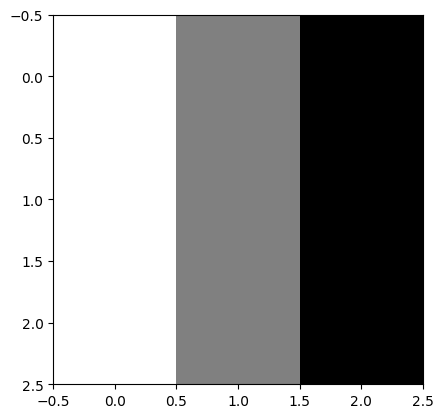

In [13]:
F = np.array([1,0,-1])
filter = np.tile(F,3).reshape(3,3)
print(filter)
plt.imshow(filter, cmap="gray")


La operación de convolución, permite construir una nueva matrix en la que se puede indentificar los bordes.

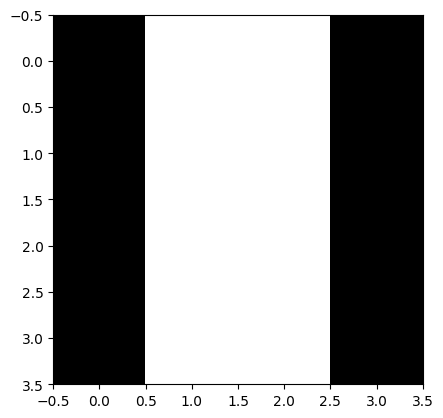

In [12]:
from scipy import signal
#new_img = np.convolve(Img, filter)
new_img = signal.convolve2d(Img, filter,mode="valid")

abs(new_img)
plt.figure()
plt.imshow(abs(new_img), cmap="gray")
plt.show()


In [14]:
new_img

array([[  0, -30, -30,   0],
       [  0, -30, -30,   0],
       [  0, -30, -30,   0],
       [  0, -30, -30,   0]])

In [ ]:
# in_img  = tf.constant(Img)
# filter_img  = tf.constant(filter)
# tf.nn.conv2d(in_img, filter_img,padding='VALID')

Apliquemos un filtro horizontal

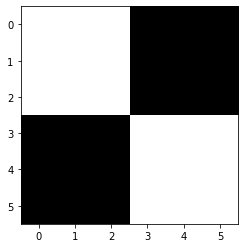

In [ ]:
M = np.array([[10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [0, 0, 0,  10,  10,  10],
       [0, 0, 0,  10,  10,  10],
       [0, 0, 0,  10,  10,  10]])

plt.imshow(M, cmap="gray")

In [ ]:
sp.Matrix(M)

Matrix([
[10, 10, 10,  0,  0,  0],
[10, 10, 10,  0,  0,  0],
[10, 10, 10,  0,  0,  0],
[ 0,  0,  0, 10, 10, 10],
[ 0,  0,  0, 10, 10, 10],
[ 0,  0,  0, 10, 10, 10]])

Matrix([
[ 1,  1,  1],
[ 0,  0,  0],
[-1, -1, -1]])

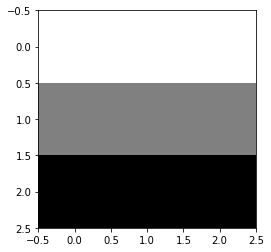

In [ ]:
F = np.array([1,0,-1])
filter = np.tile(F,3).reshape(3,3)
filter=filter.T
#print(filter)
plt.imshow(filter, cmap="gray")
sp.Matrix(filter)

[[  0   0   0   0]
 [-30 -10  10  30]
 [-30 -10  10  30]
 [  0   0   0   0]]


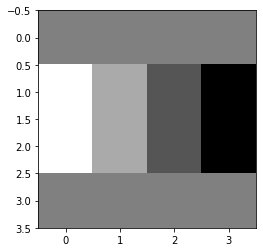

Matrix([
[ 0,  0,   0,   0],
[30, 10, -10, -30],
[30, 10, -10, -30],
[ 0,  0,   0,   0]])

In [ ]:
new_img = signal.convolve2d(M,filter,mode="valid")
print(new_img)
plt.figure()
plt.imshow(-new_img, cmap="gray")
plt.show()
sp.Matrix(-new_img)


Existen otro tipo de filtros que pueden ser empleados.

- [Sobel filter](https://en.wikipedia.org/wiki/Sobel_operator)
  ```
  filter = array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])
```
- Scharr Filter
```
filter = array([[ 3,  0, -3],
       [ 10,  0, -10],
       [ 3,  0, -3]])
```

¿Cómo elegir los parametros del filtro para detectar otro tipo de bordes?
```
filter = array([[ w1,  w2, w3],
     [ w4,  w5, w6],
     [ w7,  w8, w9]])
```

# Padding

El padding permite que la imagen resultante, sea del mismo tamaño que la original. Dada una matrix $n \times n$ asociada a una imagen y aplicada un filtro de rango $f\times f$ la operación después de la convolución es de rango $(n-f+1) \times (n-f+1)$.

Para garantizar que se tenga una imagen con el mismo tamaño de la original se aplica el padding



Para un padding de 1,tenemos entonces la siguientes dimensiones:

###  input = (n)x(n)


![input](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/input.png?raw=true)


### filter = fxf

![filter](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/filter.png?raw=true)



###  Output = (n-f+1)x(n-f+1)


![Output](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/output.png?raw=true)

--------------------------------------------------------------

 ### input con padding = (n+2p)x(n+2p)
![padding](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/padding.png?raw=true)



### filter = fxf

![filter](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/filter.png?raw=true)


###  Output = (n+2p-f+1)x(n+2p-f+1)




## Valid Padding

  - nxn * fxf ---> n-f+1

## Same Padding
The output size is the same that the input size

- n+2pxn+2p * fxf ---> n-f+1+2p x n-f+1+2p


# Stride

Salto entre valores de la imagen para hacer la convolución, en la siguiente imagen se muestra un stride de s=2.

Input : 6x6 = nxn

Filter : 3x3 = fxf

Results = Input * Filter

Results: (6-3)/2--->2x2

$\left[ \frac{n+2*p-f}{s}+1 \right] \times \left[ \frac{n+2*p-f}{s}+1 \right]$

[] operation floor


![stride](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/stride.png?raw=true)




# Convolución sobre todo el volumen:

![volumen](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/rgb_volume.png?raw=true)


## Multiples filtros sobre el volumen:


![multiples filtros](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/rgb_two_filter.png?raw=true)

Input= nxnxnc

Filter= fxfxnc

Output= n-f+1 x  n-f+1  x n'c

nc= numero de canales

n'c= el numero de filtros





REf: https://towardsdatascience.com/beginners-guide-to-understanding-convolutional-neural-networks-ae9ed58bb17d
